IMAGE PROCESSING
OPENING AND DISPLAYING IMAGE


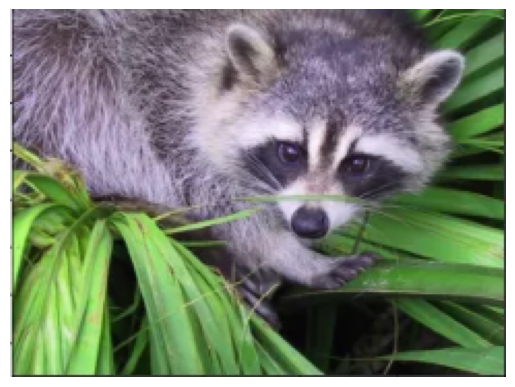

In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
img = iio.imread("rr.png")
plt.imshow(img)
plt.axis('off')
plt.show()

Creating NumPy array from Image

In [3]:
import imageio.v3 as iio
import numpy as np

img = iio.imread("rr.png")
print("Shape:", img.shape)
print("Data type:", img.dtype)

Shape: (178, 240, 4)
Data type: uint8


Creating RAW file

In [4]:
import imageio.v3 as iio
import numpy as np
img = iio.imread("rr.png")
img.tofile("rr.raw")

Opening RAW File

In [5]:
import imageio.v3 as iio
import numpy as np

orig = iio.imread("rr.png")
h, w, c = orig.shape

flat = np.fromfile('rr.raw', dtype=np.uint8)
img=flat.reshape((h,w,c))
print(img.shape)

(178, 240, 4)


Getting Statistical Information

In [6]:
import imageio.v3 as iio
import numpy as np
img = iio.imread("rr.png")

print("Max:", img.max())
print("Min:", img.min())
print("Mean:", img.mean())

Max: 255
Min: 0
Mean: 145.67792602996255


Cropping the Image

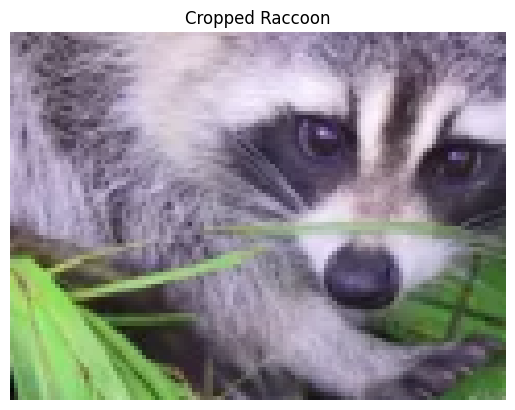

In [7]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

img = iio.imread("rr.png")
x, y, _ = img.shape

# Crop center region
crop = img[h//4 : 3*h//4, w//4 : 3*w//4]

plt.imshow(crop)
plt.axis('off')
plt.title("Cropped Raccoon")
plt.show()

Flipping Image (Vertical)

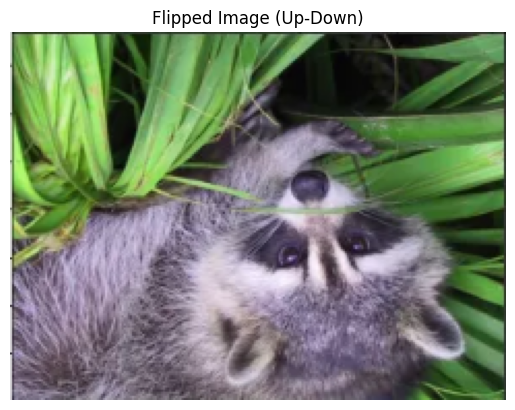

In [8]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

img = iio.imread("rr.png")
flipped = np.flipud(img)

plt.imshow(flipped)
plt.axis('off')
plt.title("Flipped Image (Up-Down)")
plt.show()

Filtering images
1. Gaussian Blur

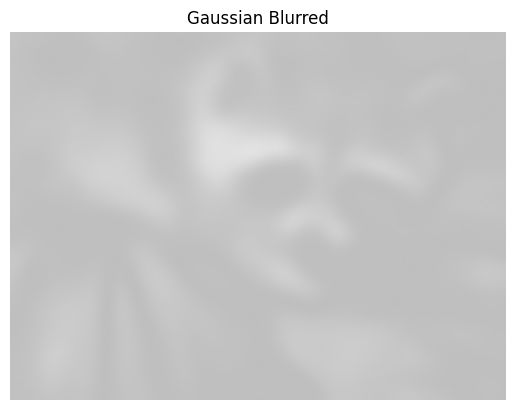

In [10]:
from scipy.ndimage import gaussian_filter
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

img = iio.imread("rr.png")
blurred = gaussian_filter(img, sigma=5)

plt.imshow(blurred.astype(np.uint8))
plt.axis('off')
plt.title("Gaussian Blurred")
plt.show()

2. Sharpening Image (Unsharp Masking)

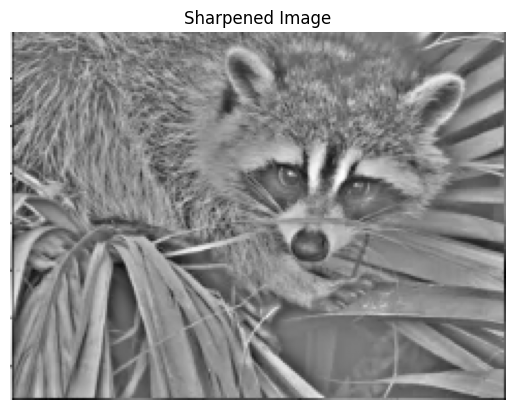

In [12]:
from skimage.color import rgb2gray, rgba2rgb
from scipy.ndimage import gaussian_filter
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

img = iio.imread("rr.png")
if img.shape[-1] == 4:
    img = rgba2rgb(img)

gray = rgb2gray(img).astype(float)
blur = gaussian_filter(gray, 5)
alpha = 30
sharp = gray + alpha * (gray - gaussian_filter(blur, 1))

plt.imshow(sharp, cmap='gray')
plt.axis('off')
plt.title("Sharpened Image")
plt.show()

Denoising Images
1. Add noise

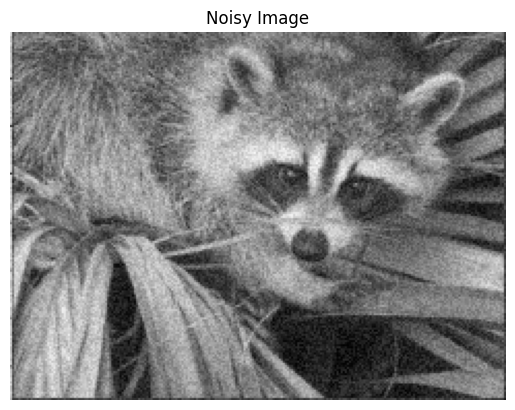

In [13]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgba2rgb

img = iio.imread("rr.png")
if img.shape[-1] == 4:
    img = rgba2rgb(img)
    
gray = rgb2gray(img).astype(float)
noise_img = gray + 0.9 * gray.std() * np.random.random(gray.shape)

plt.imshow(noise_img, cmap='gray')
plt.axis('off')
plt.title("Noisy Image")
plt.show()

2. Gaussian Denoising

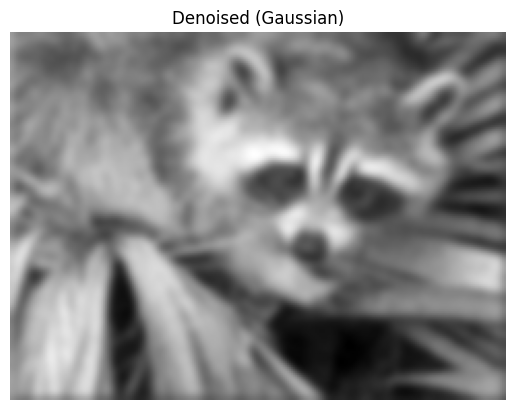

In [14]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

denoised = gaussian_filter(noise_img, sigma=2.2)
plt.imshow(denoised, cmap='gray')
plt.axis('off')
plt.title("Denoised (Gaussian)")
plt.show()

Edge Detection using Sobel Filter

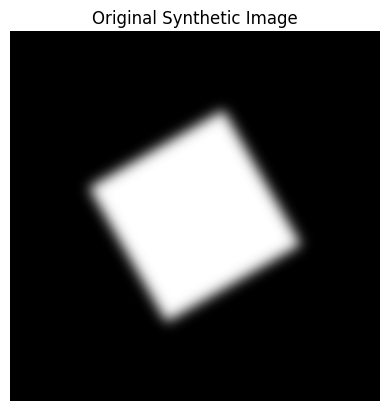

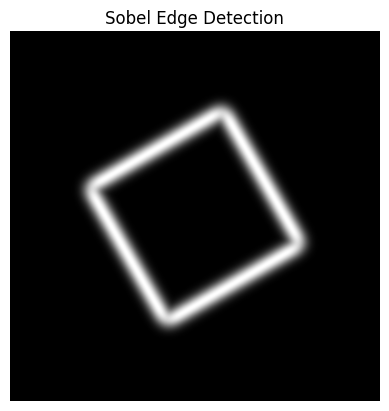

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, gaussian_filter, sobel

im = np.zeros((300, 300))
im[64:-64, 64:-64] = 1

im = rotate(im, 30, mode='constant')
im = gaussian_filter(im, sigma=7)

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title("Original Synthetic Image")
plt.show()

dx = sobel(im, axis=0, mode='constant')
dy = sobel(im, axis=1, mode='constant')
sobel_edges = np.hypot(dx, dy)

plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
plt.show()